In [1]:
%matplotlib inline

import xgboost as xgb
import common

import evaluate

In [2]:
train_data = "C:\\programming\\betting\\output\\nba\\train\\train.csv"
test_data = "C:\\programming\\betting\\output\\nba\\test\\train.csv"

In [3]:
X, y = common.read_data_from_file(train_data, "home_win", ["year", "date", "counter", "home_win", "home", "away"])
X_test, y_test = common.read_data_from_file(test_data, "home_win", ["year", "date", "counter", "home_win", "home", "away"])

dtrain = xgb.DMatrix(X, label=y)
dtest = xgb.DMatrix(X_test, label=y_test)

In [4]:
param = {'max_depth': 1, 'eta': 1, 'silent': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

In [5]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [6]:
num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-auc:0.551914	train-auc:0.604952
[1]	eval-auc:0.521415	train-auc:0.64798
[2]	eval-auc:0.530824	train-auc:0.660915
[3]	eval-auc:0.556295	train-auc:0.677628
[4]	eval-auc:0.574789	train-auc:0.684988
[5]	eval-auc:0.575438	train-auc:0.68821
[6]	eval-auc:0.579169	train-auc:0.690828
[7]	eval-auc:0.582252	train-auc:0.693326
[8]	eval-auc:0.582252	train-auc:0.696115
[9]	eval-auc:0.591175	train-auc:0.700315


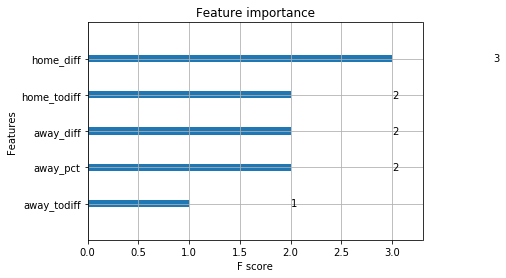

In [7]:
xgb.plot_importance(bst)

In [11]:
evaluate.evaluate("rs", bst, X_test, y_test)

AttributeError: 'DataFrame' object has no attribute 'feature_names'